In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sourcecode_dir = "Sourcecode"
sys.path.append(sourcecode_dir)

In [3]:
from QeVAE import QeVAEWrapper
from Auxillary_functions import get_dict_from_array, normalize
from main import setup_dataloaders

## Load dataset and create dataloaders

In [4]:
dataset = np.array([[1,1]]*50+ [[0,0]]*50 + [[1,0]]*20+ [[0,1]]*80)
dataset_dict = normalize(get_dict_from_array(dataset))

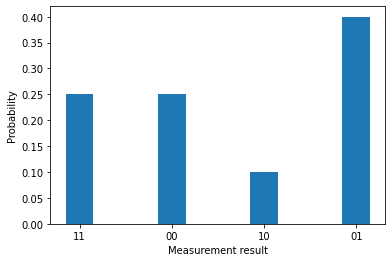

In [5]:
plt.bar(range(4), dataset_dict.values(), width=0.3)
plt.xticks(range(4),  dataset_dict.keys())
plt.ylabel("Probability"); plt.xlabel("Measurement result")
plt.show()

In [6]:
# Create training and validation datasets

dataloaders, dataloader_info = setup_dataloaders(dataset, want_datasetsize=1, train_size=0.75)
traindataloader, validdataloader = dataloaders

Size of training set: 150 | Size of validation set: 50


## Create model and start training

In [7]:
qevae = QeVAEWrapper(num_qubits=2, latentsize=1)

In [8]:
qevae.fit(traindataloader, validdataloader, original_results=dataset_dict)

Directory path: qevae-logfiles\qvae_qstatecompilation_lr001_004_2023_05_25-03_11_40_PM
(1|5 , 1|10) Total loss: 0.09348 | Likelihood loss: 0.09173 | KL loss : 0.00175 
(1|5 , 2|10) Total loss: 0.07454 | Likelihood loss: 0.07309 | KL loss : 0.00145 
(1|5 , 3|10) Total loss: 0.08028 | Likelihood loss: 0.07863 | KL loss : 0.00165 
(1|5 , 4|10) Total loss: 0.08679 | Likelihood loss: 0.08520 | KL loss : 0.00160 
(1|5 , 5|10) Total loss: 0.07583 | Likelihood loss: 0.07428 | KL loss : 0.00155 
(1|5 , 6|10) Total loss: 0.31368 | Likelihood loss: 0.31156 | KL loss : 0.00211 
(1|5 , 7|10) Total loss: 0.08117 | Likelihood loss: 0.07972 | KL loss : 0.00145 
(1|5 , 8|10) Total loss: 0.08178 | Likelihood loss: 0.08038 | KL loss : 0.00141 
(1|5 , 9|10) Total loss: 0.08491 | Likelihood loss: 0.08355 | KL loss : 0.00136 
(1|5 , 10|10) Total loss: 0.27013 | Likelihood loss: 0.26826 | KL loss : 0.00187 
Fidelity: 0.9644362015036378
Time taken 38.411482s
Epoch: 01/05 | Beta 1.000 | Avg Train Loss: 0.1243 

## Generate measurement probability distribution from decoder

In [11]:
qevae.sample()

tensor([0.3125, 0.2949, 0.0713, 0.3213])